<img src="https://www.th-koeln.de/img/logo.svg" style="float:right;" width="200">

# 4th exercise: <font color="#C70039">Use Isolation Forest for anomaly detection</font>
* Course: AML
* Lecturer: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Author of notebook: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Date:   04.09.2024

<img src="https://www.researchgate.net/publication/352017898/figure/fig1/AS:1029757483372550@1622524724599/Isolation-Forest-learned-iForest-construction-for-toy-dataset.png" style="float: center;" width="450">

---------------------------------
**GENERAL NOTE 1**:
Please make sure you are reading the entire notebook, since it contains a lot of information on your tasks (e.g. regarding the set of certain paramaters or a specific computational trick), and the written mark downs as well as comments contain a lot of information on how things work together as a whole.

**GENERAL NOTE 2**:
* Please, when commenting source code, just use English language only.
* When describing an observation please use English language, too
* This applies to all exercises throughout this course.  

---------------------

### <font color="ce33ff">DESCRIPTION</font>:
This notebook allows you for using the Isolation Forest algorithm for anomaly detection. Isolation Forest is an unsupervised learning algorithm that belongs to the ensemble decision trees family. The following <a href="https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/icdm08b.pdf">paper</a> explains the details on its theory and implementation.

-------------------------------------------------------------------------------------------------------------

### <font color="FFC300">TASKS</font>:
The tasks that you need to work on within this notebook are always indicated below as bullet points.
If a task is more challenging and consists of several steps, this is indicated as well.
Make sure you have worked down the task list and commented your doings.
This should be done by using markdown.<br>
<font color=red>Make sure you don't forget to specify your name and your matriculation number in the notebook.</font>

**YOUR TASKS in this exercise are as follows**:
1. import the notebook to Google Colab or use your local machine.
2. make sure you specified you name and your matriculation number in the header below my name and date.
    * set the date too and remove mine.
3. read the entire notebook carefully
    * add comments whereever you feel it necessary for better understanding
    * run the notebook for the first time.

4. take the three data sets from exercize 1 and apply the isolation forest to them.
5. implement an appropriate visualisation (chart) that renders the result (anomaly={yes,no}) for every data point TOGETHER with the original data point in your data set.
-----------------------------------------------------------------------------------

### First example

In [1]:
from sklearn.ensemble import IsolationForest
import numpy as np
from numpy.random import randn

np.random.seed(1)
random_data = np.random.randn(50000,2)  * 20 + 20

This code will output the predictions for each data point in an array. If the result is -1, it means that this specific data point is an outlier. If the result is 1, then it means that the data point is not an outlier.

In [2]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html
isolation_forest1 = IsolationForest(max_samples=100, random_state = 1, contamination= 'auto')

# Note, that fit and predict is called mutually (compare with code below!)
# Performs a fit on data and returns labels for that data
outlier_labels = isolation_forest1.fit_predict(random_data)

outlier_labels[0:200]

array([-1,  1, -1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,
       -1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1,
       -1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
       -1, -1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1])

### Second example

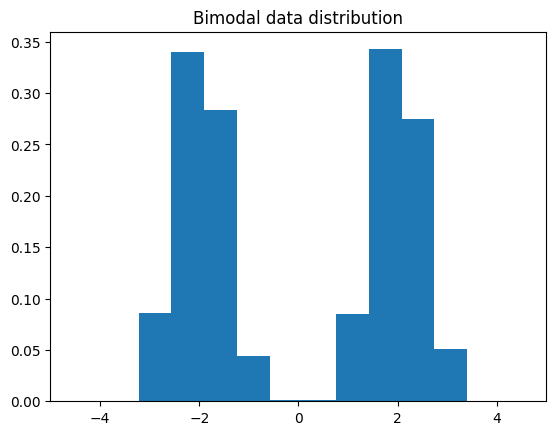

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# create a bimodal data distribution and visualize it
bimod_data = np.concatenate((np.random.normal(loc=-2,scale=.5,size=500),
                             np.random.normal(loc=2, scale=.5,size=500)))

plt.hist(bimod_data, density=True)
plt.xlim([-5, 5])
plt.title("Bimodal data distribution")
plt.show()

Note, that there are three regions where the data has low probability to appear:
* one on the right side of the distribution
* another one on the left
* and another around zero.

Let's see if the IsolationForest is able to identify these three regions

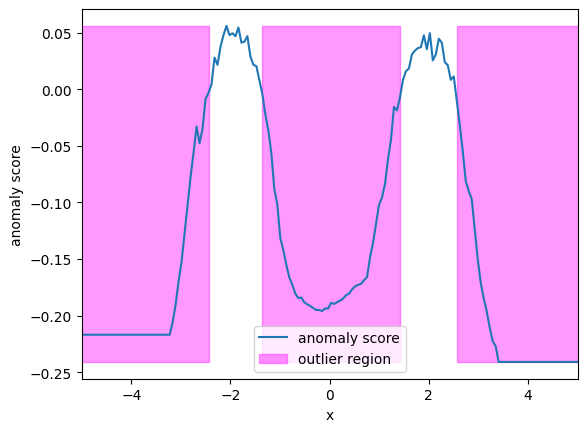

In [4]:
# create the IF with n=100 estimators (remember IF is a ensemble method)
isolation_forest2 = IsolationForest(n_estimators=100)
isolation_forest2.fit(bimod_data.reshape(-1, 1))

# create a test data set for rasterizing the x-axis the get the anomaly score for it.
anomaly_score_test_data = np.linspace(-6, 6, 200).reshape(-1,1)

# get the anomaly score (y) for each testing data point on x
anomaly_score = isolation_forest2.decision_function(anomaly_score_test_data)
# classify into an outlier or not (asc < 0 -> outlier)
outlier_labels = isolation_forest2.predict(anomaly_score_test_data)

# visalize both: anomaly_score and outlier
plt.plot(anomaly_score_test_data, anomaly_score, label='anomaly score')
plt.fill_between(anomaly_score_test_data.T[0], np.min(anomaly_score), np.max(anomaly_score),
                 where=outlier_labels==-1, color='#FF00FF',
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('x')
plt.xlim([-5, 5])
plt.show()

# Data Set 1: Resting Blood Pressure

In [6]:
import pandas as pd

In [8]:
#Access the dataset (Source = https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset)
url_1 = 'https://raw.githubusercontent.com/len-rtz/AML/refs/heads/wip/data/heart.csv'

# Load the dataset
df_1 = pd.read_csv(url_1)

# Inspect the dataset to see the column names
print(df_1.columns)

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')


In [16]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html
isolation_forest1 = IsolationForest(max_samples=100, random_state = 1, contamination= 'auto')

# Extract the resting blood pressure (in mm Hg) column and drop missing values
heart_rate_data = df_1['trtbps'].dropna()

# Reshape the data to a 2D array
heart_rate_data_reshaped = heart_rate_data.values.reshape(-1, 1)

# Note, that fit and predict is called mutually (compare with code below!)
# Performs a fit on data and returns labels for that data
outlier_labels = isolation_forest1.fit_predict(heart_rate_data_reshaped)

outlier_labels[0:200]

array([-1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1, -1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1, -1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1,
       -1, -1, -1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1, -1, -1, -1, -1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1, -1, -1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1])

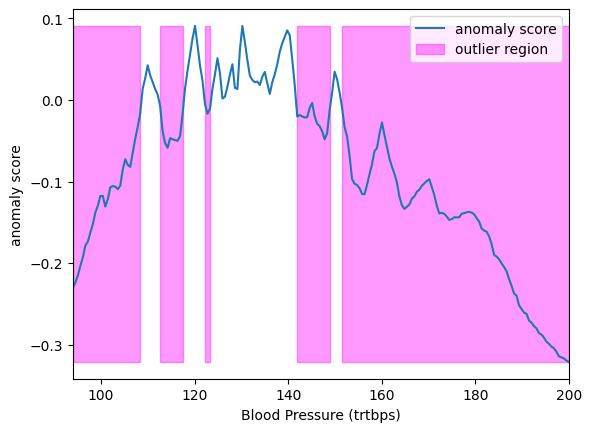

In [14]:
# Extract blood pressure column
blood_pressure = df_1['trtbps'].values

# Train Isolation Forest on blood pressure data
isolation_forest2 = IsolationForest(n_estimators=100)
isolation_forest2.fit(blood_pressure.reshape(-1, 1))

# Create test data within the range of blood pressure
anomaly_score_test_data = np.linspace(blood_pressure.min(), blood_pressure.max(), 200).reshape(-1, 1)

# Get anomaly score for each testing data point
anomaly_score = isolation_forest2.decision_function(anomaly_score_test_data)

# Classify into outlier or not
outlier_labels = isolation_forest2.predict(anomaly_score_test_data)

# Visualize both: anomaly_score and outlier
plt.plot(anomaly_score_test_data, anomaly_score, label='anomaly score')
plt.fill_between(anomaly_score_test_data.T[0], np.min(anomaly_score), np.max(anomaly_score),
                 where=outlier_labels == -1, color='#FF00FF',
                 alpha=0.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Blood Pressure (trtbps)')
plt.xlim([blood_pressure.min(), blood_pressure.max()])  # Dynamic X-axis limit
plt.show()

# Data Set 2: Weight of Babies

In [17]:
#Access the dataset (Source = https://www.kaggle.com/datasets/danbraswell/temporary-us-births)
url_2 = 'https://raw.githubusercontent.com/len-rtz/AML/refs/heads/wip/data/us_births_2016_2021.csv'

# Load the dataset
df_2 = pd.read_csv(url_2)

# Inspect the dataset to see the column names
print(df_2.columns)

Index(['State', 'State Abbreviation', 'Year', 'Gender',
       'Education Level of Mother', 'Education Level Code', 'Number of Births',
       'Average Age of Mother (years)', 'Average Birth Weight (g)'],
      dtype='object')


In [18]:
# Extract the weight column and drop missing values
baby_weight_data = df_2['Average Birth Weight (g)'].dropna()

In [19]:
# Reshape the data to a 2D array
baby_weight_data_reshaped = baby_weight_data.values.reshape(-1, 1)

# Note, that fit and predict is called mutually (compare with code below!)
# Performs a fit on data and returns labels for that data
outlier_labels = isolation_forest1.fit_predict(baby_weight_data_reshaped)

outlier_labels[0:200]

array([-1, -1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,
       -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,
        1, -1,  1, -1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,
        1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
        1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,
        1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,
        1,  1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1])

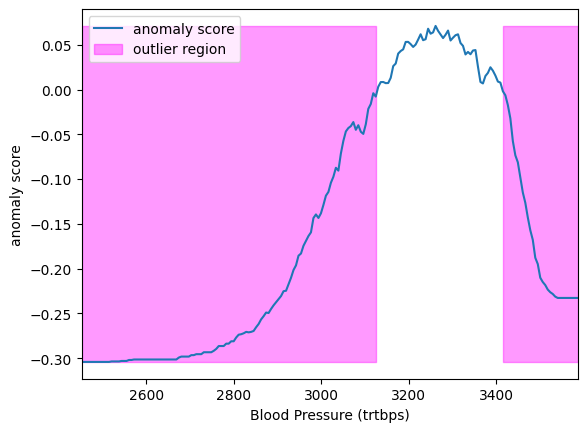

In [21]:
# Extract baby weight column
baby_weights = df_2['Average Birth Weight (g)'].values

# Train Isolation Forest
isolation_forest2 = IsolationForest(n_estimators=100)
isolation_forest2.fit(baby_weights.reshape(-1, 1))

# Create test data within the range of weights
anomaly_score_test_data = np.linspace(baby_weights.min(), baby_weights.max(), 200).reshape(-1, 1)

# Get anomaly score for each testing data point
anomaly_score = isolation_forest2.decision_function(anomaly_score_test_data)

# Classify into outlier or not
outlier_labels = isolation_forest2.predict(anomaly_score_test_data)

# Visualize both: anomaly_score and outlier
plt.plot(anomaly_score_test_data, anomaly_score, label='anomaly score')
plt.fill_between(anomaly_score_test_data.T[0], np.min(anomaly_score), np.max(anomaly_score),
                 where=outlier_labels == -1, color='#FF00FF',
                 alpha=0.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Average Weight Data (g)')
plt.xlim([baby_weights.min(), baby_weights.max()])  # Dynamic X-axis limit
plt.show()

# Data Set 3: Renewable Power Production France

In [22]:
#Access the dataset (Source = https://www.kaggle.com/datasets/henriupton/wind-solar-electricity-production)
url_3 = 'https://raw.githubusercontent.com/len-rtz/AML/refs/heads/wip/data/intermittent-renewables-production-france.csv'

# Load the dataset
df_3 = pd.read_csv(url_3)

# Inspect the dataset to see the column names
print(df_3.columns)

Index(['Date and Hour', 'Date', 'StartHour', 'EndHour', 'Source', 'Production',
       'dayOfYear', 'dayName', 'monthName'],
      dtype='object')


In [23]:
# Extract the production in MWh column and drop missing values
renewable_energy_data = df_3['Production'].dropna()

In [24]:
# Reshape the data to a 2D array
energy_data_reshaped = renewable_energy_data.values.reshape(-1, 1)

# Note, that fit and predict is called mutually (compare with code below!)
# Performs a fit on data and returns labels for that data
outlier_labels = isolation_forest1.fit_predict(energy_data_reshaped)

outlier_labels[0:200]

array([-1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,
        1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1, -1, -1,
       -1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,
       -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1, -1, -1,  1, -1, -1,  1])

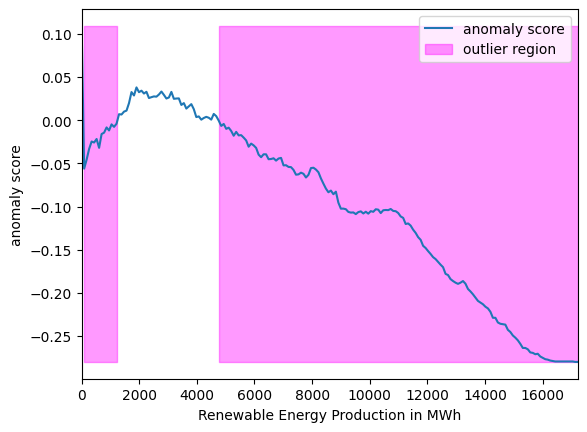

In [28]:
# Extract energy production
energy_production = df_3['Production'].values

# Ensure there are no Inf values
energy_production = energy_production[np.isfinite(energy_production)]

# Train Isolation Forest on blood pressure data
isolation_forest2 = IsolationForest(n_estimators=100)
isolation_forest2.fit(energy_production.reshape(-1, 1))

# Create test data within the range of blood pressure
anomaly_score_test_data = np.linspace(energy_production.min(), energy_production.max(), 200).reshape(-1, 1)

# Get anomaly score for each testing data point
anomaly_score = isolation_forest2.decision_function(anomaly_score_test_data)

# Classify into outlier or not
outlier_labels = isolation_forest2.predict(anomaly_score_test_data)

# Visualize both: anomaly_score and outlier
plt.plot(anomaly_score_test_data, anomaly_score, label='anomaly score')
plt.fill_between(anomaly_score_test_data.T[0], np.min(anomaly_score), np.max(anomaly_score),
                 where=outlier_labels == -1, color='#FF00FF',
                 alpha=0.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Renewable Energy Production in MWh')
plt.xlim([energy_production.min(), energy_production.max()])  # Dynamic X-axis limit
plt.show()

# Concolusion

Isolation Forest seems to be an efficient method for anomaly detection, especially when dealing with numerical data. However, its limitations in handling subtle anomalies looks problematic.